<a href="https://colab.research.google.com/github/systic2/colab/blob/main/10%EC%86%90%EC%98%81%EC%88%98_%EB%B9%85%EB%8D%B0%EC%9D%B4%ED%84%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [101]:
from IPython.display import set_matplotlib_formats, display
import numpy as np
import pandas as pd
from cycler import cycler
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
!pip install mglearn
import mglearn
import sklearn
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
plt.rc('font', family='NanumBarunGothic') 
set_matplotlib_formats('pdf', 'png')
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['image.cmap'] = "viridis"
plt.rcParams['image.interpolation'] = "none"
plt.rcParams['savefig.bbox'] = "tight"
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['legend.numpoints'] = 1
plt.rc('axes', prop_cycle=(
    cycler('color', mglearn.plot_helpers.cm_cycle.colors) +
    cycler('linestyle', ['-', '-', "--", (0, (3, 3)), (0, (1.5, 1.5))])))

np.set_printoptions(precision=3, suppress=True)

pd.set_option("display.max_columns", 8)
pd.set_option('precision', 2)

__all__ = ['np', 'mglearn', 'display', 'plt', 'pd']

from sklearn.model_selection import train_test_split

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


타이타닉 데이터 불러오기

In [102]:
titanic=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/titanic.csv')
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [103]:
titanic.head()

,PassengerId,Survived,Pclass,Name,...,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",...,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",...,PC 17599,71.28,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",...,STON/O2. 3101282,7.92,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",...,113803,53.10,C123,S
4,5,0,3,"Allen, Mr. William Henry",...,373450,8.05,NaN,S


In [104]:
titanic = titanic.rename(columns={'PassengerId':'승객번호', 'Survived':'생존여부', 
                        'Pclass':'사회적지위', 'Name':'이름', 'Sex':'성별', 
                        'Age':'나이', 'SibSp':'배우자및형제자매수', 'Parch':'부모자식수', 
                        'Ticket':'티켓번호', 'Fare':'티켓가격', 'Cabin':'객실',
                        'Embarked':'탑승항구'})
titanic

,승객번호,생존여부,사회적지위,이름,...,티켓번호,티켓가격,객실,탑승항구
0,1,0,3,"Braund, Mr. Owen Harris",...,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",...,PC 17599,71.28,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",...,STON/O2. 3101282,7.92,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",...,113803,53.10,C123,S
4,5,0,3,"Allen, Mr. William Henry",...,373450,8.05,NaN,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",...,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",...,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",...,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",...,111369,30.00,C148,C


Q1 : 타이타닉호에 승선했던 승객은 누구인가?

승선한 사람들 이름, 나이, 성별 출력

In [105]:
titanic_passenger = titanic[['이름', '나이', '성별']]
titanic_passenger

,이름,나이,성별
0,"Braund, Mr. Owen Harris",22.0,male
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,female
2,"Heikkinen, Miss. Laina",26.0,female
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,female
4,"Allen, Mr. William Henry",35.0,male
...,...,...,...
886,"Montvila, Rev. Juozas",27.0,male
887,"Graham, Miss. Margaret Edith",19.0,female
888,"Johnston, Miss. Catherine Helen ""Carrie""",NaN,female
889,"Behr, Mr. Karl Howell",26.0,male


성별 탑승인원 수

In [106]:
titanic['성별'].value_counts()

male      577
female    314
Name: 성별, dtype: int64

사회적지위에 따른 탑승인원

In [107]:
titanic['사회적지위'].value_counts()

3    491
1    216
2    184
Name: 사회적지위, dtype: int64

Q2 : 승객은 어떤 DECK에 있었으며, 그들의 class와 어떤 관계가 있는가?

사회적지위(class)와 객실(DECK) 정보 추출

In [108]:
titanic_deck_class = titanic[['사회적지위', '객실']]

titanic_deck_class.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   사회적지위   891 non-null    int64 
 1   객실      204 non-null    object
dtypes: int64(1), object(1)
memory usage: 14.0+ KB


객실 정보가 없는 사람 제외

In [109]:
titanic_deck_class_non = titanic_deck_class.dropna(axis=0)
titanic_deck_class_non.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 204 entries, 1 to 889
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   사회적지위   204 non-null    int64 
 1   객실      204 non-null    object
dtypes: int64(1), object(1)
memory usage: 4.8+ KB


In [110]:
titanic_deck_class_non['객실'] = titanic_deck_class_non['객실'].str[:1]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [111]:
titanic_deck_class_non

,사회적지위,객실
1,1,C
3,1,C
6,1,E
10,3,G
11,1,C
...,...,...
871,1,D
872,1,B
879,1,C
887,1,B


사회적지위 1(가장 높음)

In [112]:
titanic_class1 = titanic_deck_class_non[titanic_deck_class_non['사회적지위']==1]
titanic_class1_deck = titanic_class1.groupby(titanic_class1['객실'])

In [113]:
titanic_class1_deck.size()

객실
A    15
B    47
C    59
D    29
E    25
T     1
dtype: int64

사회적지위 2

In [114]:
titanic_class2 = titanic_deck_class_non[titanic_deck_class_non['사회적지위']==2]
titanic_class2_deck = titanic_class2.groupby(titanic_class2['객실'])

In [115]:
titanic_class2_deck.size()

객실
D    4
E    4
F    8
dtype: int64

사회적지위 3

In [116]:
titanic_class3 = titanic_deck_class_non[titanic_deck_class_non['사회적지위']==3]
titanic_class3_deck = titanic_class3.groupby(titanic_class3['객실'])

In [117]:
titanic_class3_deck.size()

객실
E    3
F    5
G    4
dtype: int64

사회적 지위가 높을수록 A,B,C 객실(DECK)에 배치되어있었음을 확인할 수 있다

Q3 : 어떤 요소가 승객들을 생존하게 만들었을까?  
- 침몰한 타이타닉호에서도 어떤 요소가 생존 확률을 높였는지 분석
- 생존한 승객 정보는 Survived에 0과 1로 표기됨

In [118]:
titanic_survived = titanic[titanic['생존여부']==1]
titanic_dead = titanic[titanic['생존여부']==0]

In [119]:
print("생존 : ", titanic_survived['생존여부'].count())
print("사망 : ", titanic_dead['생존여부'].count())

생존 :  342
사망 :  549


In [120]:
titanic1 = titanic[['생존여부','사회적지위','성별','나이','배우자및형제자매수','부모자식수','티켓가격','탑승항구']]
titanic1.isnull().sum()

생존여부           0
사회적지위          0
성별             0
나이           177
배우자및형제자매수      0
부모자식수          0
티켓가격           0
탑승항구           2
dtype: int64

In [121]:
print(titanic1['생존여부'].count())

891


나이 결측값을 성별 별 중앙값으로 대체

In [122]:
titanic1['나이'].fillna(titanic1.groupby('성별')['나이'].transform("median"), inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


탑승항구 결측값 삭제

In [123]:
titanic1 = titanic1.dropna(axis=0)

In [124]:
titanic1.isnull().sum()

생존여부         0
사회적지위        0
성별           0
나이           0
배우자및형제자매수    0
부모자식수        0
티켓가격         0
탑승항구         0
dtype: int64

탑승항구 문자열 확인

In [125]:
print(titanic1['탑승항구'].value_counts())

S    644
C    168
Q     77
Name: 탑승항구, dtype: int64


탑승항구 범주형 변수 수치로 변경  
S : 0, C : 1, Q : 2

In [126]:
embarked_map = {'S':0, 'C':1, 'Q':2}
titanic1['탑승항구'] = titanic1['탑승항구'].map(embarked_map)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [127]:
titanic1

,생존여부,사회적지위,성별,나이,배우자및형제자매수,부모자식수,티켓가격,탑승항구
0,0,3,male,22.0,1,0,7.25,0
1,1,1,female,38.0,1,0,71.28,1
2,1,3,female,26.0,0,0,7.92,0
3,1,1,female,35.0,1,0,53.10,0
4,0,3,male,35.0,0,0,8.05,0
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.00,0
887,1,1,female,19.0,0,0,30.00,0
888,0,3,female,27.0,1,2,23.45,0
889,1,1,male,26.0,0,0,30.00,1


성별 문자열 확인

In [128]:
print(titanic1['성별'].value_counts())

male      577
female    312
Name: 성별, dtype: int64


성별 범주형 변수 수치로 변경  
male : 0, female : 1

In [129]:
sex_map = {'male' : 0, 'female' : 1}
titanic1['성별'] = titanic1['성별'].map(sex_map)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [130]:
titanic1

,생존여부,사회적지위,성별,나이,배우자및형제자매수,부모자식수,티켓가격,탑승항구
0,0,3,0,22.0,1,0,7.25,0
1,1,1,1,38.0,1,0,71.28,1
2,1,3,1,26.0,0,0,7.92,0
3,1,1,1,35.0,1,0,53.10,0
4,0,3,0,35.0,0,0,8.05,0
...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.00,0
887,1,1,1,19.0,0,0,30.00,0
888,0,3,1,27.0,1,2,23.45,0
889,1,1,0,26.0,0,0,30.00,1


나이와 티켓가격 컬럼 정규화

In [131]:
from sklearn.preprocessing import MinMaxScaler
scaler_age = MinMaxScaler()
scaler_fare = MinMaxScaler()
scaler_age.fit(titanic1[['나이']])
scaler_fare.fit(titanic1[['티켓가격']])
titanic1['나이'] = scaler_age.transform(titanic1[['나이']])
titanic1['티켓가격'] = scaler_fare.transform(titanic1[['티켓가격']])
titanic1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,생존여부,사회적지위,성별,나이,배우자및형제자매수,부모자식수,티켓가격,탑승항구
0,0,3,0,0.27,1,0,0.01,0
1,1,1,1,0.47,1,0,0.14,1
2,1,3,1,0.32,0,0,0.02,0
3,1,1,1,0.43,1,0,0.10,0
4,0,3,0,0.43,0,0,0.02,0
...,...,...,...,...,...,...,...,...
886,0,2,0,0.33,0,0,0.03,0
887,1,1,1,0.23,0,0,0.06,0
888,0,3,1,0.33,1,2,0.05,0
889,1,1,0,0.32,0,0,0.06,1


In [132]:
from sklearn.decomposition import PCA
titanic_features = titanic1.drop('생존여부', axis=1)
pca = PCA(n_components=2)
pca.fit(titanic_features)
titanic_pca = pca.transform(titanic_features)
print(str(titanic_pca.shape))

(889, 2)


Text(0, 0.5, '두 번째 주성분')

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/_backend_pdf_ps.py:62: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=ft2font.LOAD_NO_HINTING)


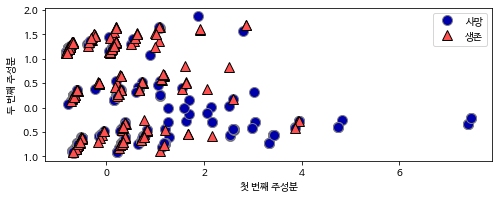

In [133]:
plt.figure(figsize=(8,8))
mglearn.discrete_scatter(titanic_pca[:,0], titanic_pca[:,1], titanic1['생존여부'])
plt.legend(['사망', '생존'], loc='best')
plt.gca().set_aspect("equal")
plt.xlabel("첫 번째 주성분")
plt.ylabel("두 번째 주성분")

In [134]:
print(pca.components_)

[[ 0.094  0.076 -0.038  0.887  0.441  0.013 -0.05 ]
 [-0.972  0.129  0.058  0.012  0.154  0.067 -0.081]]


In [135]:
titanic_features.columns

Index(['사회적지위', '성별', '나이', '배우자및형제자매수', '부모자식수', '티켓가격', '탑승항구'], dtype='object')

Text(0, 0.5, '주성분')

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/_backend_pdf_ps.py:62: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=ft2font.LOAD_NO_HINTING)


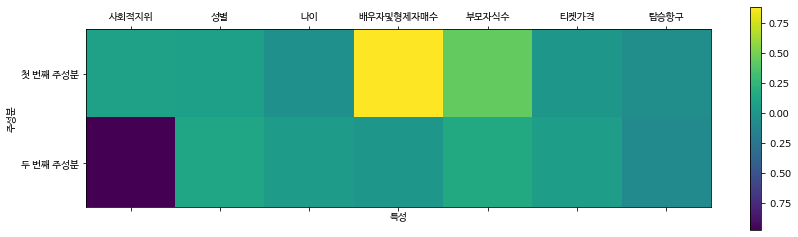

In [136]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1], ['첫 번째 주성분', '두 번째 주성분'])
plt.colorbar()
plt.xticks(np.arange(0,7),labels=['사회적지위', '성별', '나이', '배우자및형제자매수', '부모자식수', '티켓가격', '탑승항구'])
plt.xlabel('특성')
plt.ylabel('주성분')

주성분 분석으로 분석하였을 때  
첫번째 주성분에서는 가족인원 수(배우자및형제자매수, 부모자식수)가 가장 큰 영향을 준 것으로 판단되고  
두번째 주성분에서는 사회적지위가 가장 적은 영향을 준 것으로 판단함

Q4 : 생존자는 몇 명인지 그래프로 확인하시오

In [137]:
titanic_survived = titanic[titanic['생존여부']==1]
titanic_dead = titanic[titanic['생존여부']==0]
label = {0:'사망', 1:'생존'}
index = np.arange(len(label))

In [138]:
print("생존 : ", titanic_survived['생존여부'].count())
print("사망 : ", titanic_dead['생존여부'].count())

생존 :  342
사망 :  549


In [139]:
sum_of_people = titanic['생존여부'].value_counts()
sum_of_people

0    549
1    342
Name: 생존여부, dtype: int64

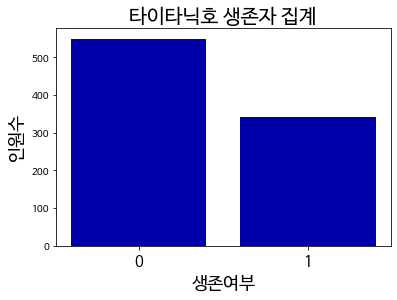

In [140]:
plt.bar(index, sum_of_people)
plt.title('타이타닉호 생존자 집계', fontsize=20)
plt.xlabel('생존여부', fontsize=18)
plt.ylabel('인원수', fontsize=18)
plt.xticks(index, label, fontsize=15)
plt.show()

Q5 : 생존 확률에 어떤 요소들이 작용했는지 알아보기 위해 Pclass 속성에 대해  
다른 속성들과의 상관관계가 있는지 2개 이상 속성으로 상관관계를 시각화를 통해 도출하시오

생존한 사람들의 사회적지위간 생존자 분포

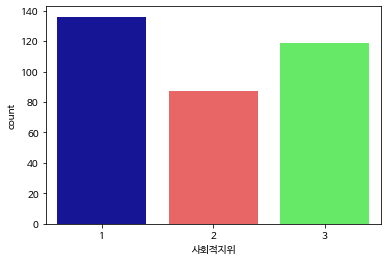

In [141]:
sns.countplot(x=titanic_survived['사회적지위'], data=titanic)

생존한 사람들의 성별과 사회적지위간 관계 확인

In [142]:
titanic_survived_sex=titanic[titanic['생존여부']==1]['성별']

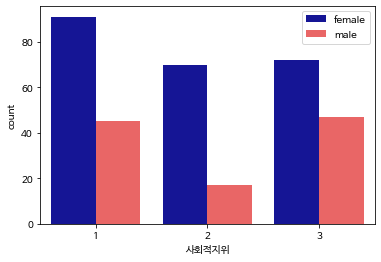

In [143]:
sns.countplot(x=titanic_survived['사회적지위'], hue=list(titanic_survived_sex), data=titanic)

생존한 사람들의 나이와 사회적지위간 관계

In [144]:
titanic_survived_age=titanic[titanic['생존여부']==1]['나이']

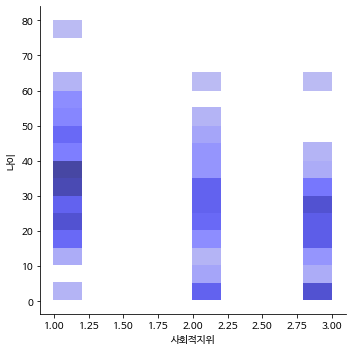

In [145]:
sns.displot(x=titanic_survived['사회적지위'], y=titanic_survived_age, data=titanic)

생존자 사회적지위와 티켓가격간 관계

In [146]:
titanic_survived_fare=titanic[titanic['생존여부']==1]['티켓가격']

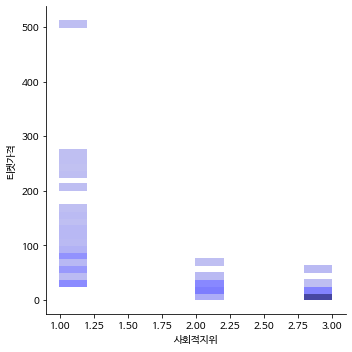

In [147]:
sns.displot(x=titanic_survived['사회적지위'], y=titanic_survived_fare, data=titanic)